<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Analytics_vidhya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
df_raw_train=pd.read_csv("/content/drive/MyDrive/Analytics_vidya_hack/train_0OECtn8.csv")

In [114]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Analytics_vidya_hack/test_1zqHu22.csv")

In [115]:
df_raw_train.shape

(89197, 10)

In [116]:
df_raw_train.isna().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [117]:
df_raw_train.drop(df_raw_train.columns[[0, 1]], axis = 1, inplace = True)

In [118]:
df_raw_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,Male,Student,180,1000,4.33
1,32,132,14,Female,Student,330,714,1.79
2,12,24,19,Male,Student,180,138,4.35
3,23,112,19,Male,Student,220,613,3.77
4,23,112,27,Male,Working Professional,220,613,3.13


In [119]:
df_raw_train['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

In [120]:
df_raw_train['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

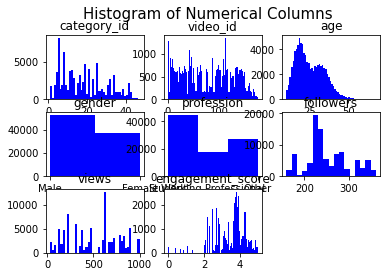

In [73]:
plt.suptitle('Histogram of Numerical Columns', fontsize = 15)
for i in range(1, df_raw_train.shape[1]+ 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df_raw_train.columns.values[i - 1])
    
    vals = np.size(df_raw_train.iloc[:, i - 1].unique())
    
    plt.hist(df_raw_train.iloc[:, i - 1], bins = vals, color = 'blue')

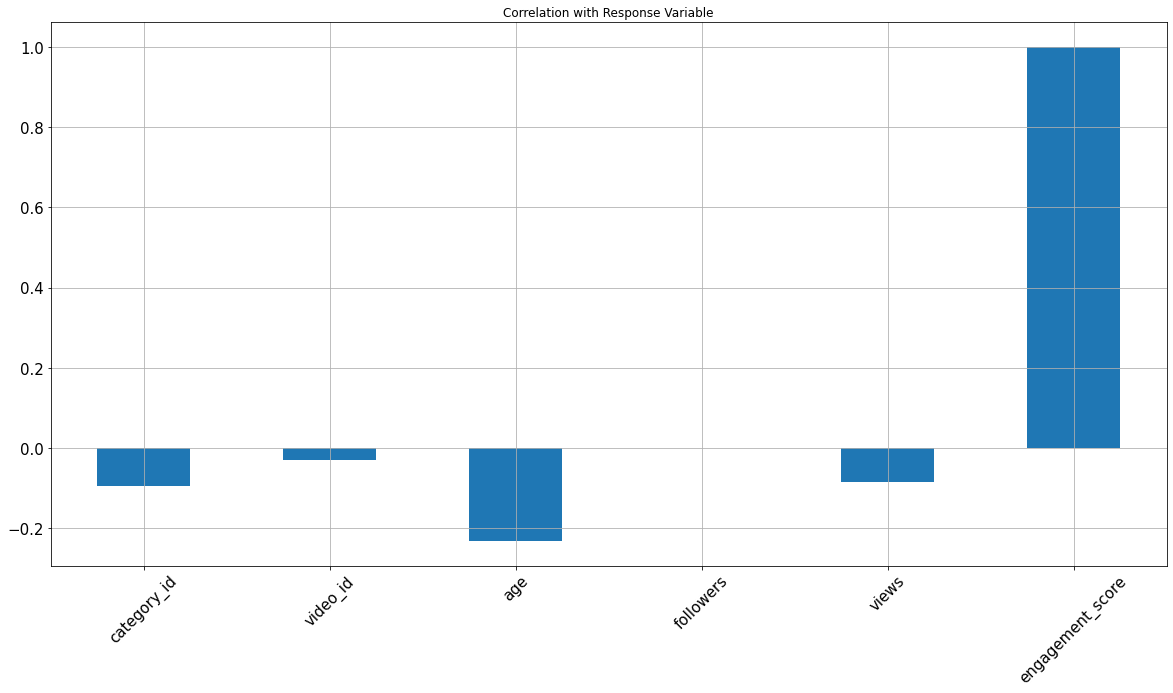

In [24]:
df_raw_train.corrwith(df_raw_train.engagement_score).plot.bar(figsize = (20, 10),
                  title = 'Correlation with Response Variable',
                  fontsize = 15, rot = 45,
                  grid = True)

In [121]:
df_raw_train.dtypes

category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

In [122]:
cols = ['category_id','video_id','age','followers','views'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [123]:
df_raw_train.shape

(89197, 8)

In [124]:
df_new_train.shape

(87176, 8)

In [81]:
x_train = df_new_train[df_new_train.columns[[0,1,2,5,6]]]

In [82]:
x_train.head()

,category_id,video_id,age,followers,views
0,37,128,24,180,1000
1,32,132,14,330,714
2,12,24,19,180,138
3,23,112,19,220,613
4,23,112,27,220,613


In [83]:
VIF = []
from statsmodels.stats.outliers_influence import variance_inflation_factor
for j in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train.values,j))
print(VIF)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[5.166702457618238, 5.390482818733854, 7.236991135810488, 13.873815748223164, 5.101635418963957]


In [85]:
np.transpose(VIF)
pd.DataFrame(x_train.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

,0,0
0,category_id,5.166702
1,video_id,5.390483
2,age,7.236991
3,followers,13.873816
4,views,5.101635


In [88]:
y= df_new_train['engagement_score']

In [125]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_new_train['gender'] = LE.fit_transform(df_new_train['gender'])
df_new_train['profession'] = LE.fit_transform(df_new_train['profession'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [126]:
df_new_train.head()

,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,37,128,24,1,1,180,1000,4.33
1,32,132,14,0,1,330,714,1.79
2,12,24,19,1,1,180,138,4.35
3,23,112,19,1,1,220,613,3.77
4,23,112,27,1,2,220,613,3.13


In [129]:
x= df_new_train.iloc[:,0:7]

In [131]:
y = df_new_train['engagement_score']

In [134]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x)

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=20)

In [136]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(65382, 7)
(65382,)
(21794, 7)
(21794,)


In [138]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

In [154]:
from sklearn.metrics import mean_squared_error,r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)*100
print(mse_lr)
print(r2_score_lr)

0.5719008316104722
23.31461056797901


In [156]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion = "mse", max_depth=9)

In [157]:
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [158]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_score_dt = r2_score(y_test, y_pred_dt)*100
print(mse_dt)
print(r2_score_dt)

0.5097705100788131
31.645579223462793


In [161]:
dt_mse_score = []
dt_r2_score = []
md = range(1,20)
for i in md:
    dt = DecisionTreeRegressor(criterion = "mse", max_depth=i)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_r2_score.append(r2_score(y_test, y_pred_dt)*100)
    dt_mse_score.append(mean_squared_error(y_test,dt_pred))
print(dt_mse_score)
print(dt_r2_score)


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[0.6226069262980123, 0.5858880660952881, 0.5595018728410336, 0.5462542406948615, 0.5342413881054073, 0.5247331139275239, 0.5188812803514556, 0.5124050645901812, 0.5098569100053985, 0.5093522539993174, 0.5123418340284203, 0.5195038826073773, 0.5274545893423267, 0.5422571861863767, 0.5550554238944767, 0.569941208566762, 0.587383332271411, 0.6043889619052921, 0.6176189780661837]
[31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793, 31.645579223462793]


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


No handles with labels found to put in legend.


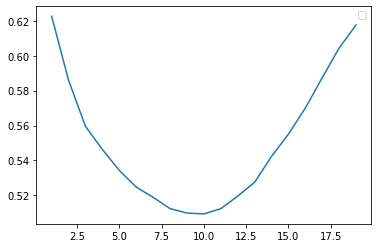

In [168]:
import matplotlib.pyplot as plt
plt.plot(md, dt_mse_score)
plt.legend()
plt.show()

No handles with labels found to put in legend.


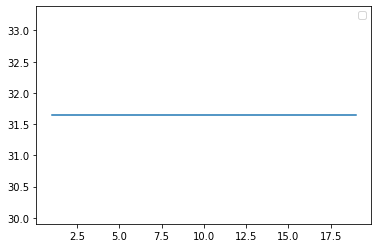

In [169]:
import matplotlib.pyplot as plt
plt.plot(md, dt_r2_score)
plt.legend()
plt.show()

In [170]:
from sklearn.ensemble import BaggingRegressor
Bag= BaggingRegressor(base_estimator=DT, max_samples=0.9,
                  n_estimators=500)

In [171]:
Bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                      max_depth=9),
                 max_samples=0.9, n_estimators=500)

In [172]:
y_pred_bag= Bag.predict(x_test)

In [183]:
bag_mse = mean_squared_error(y_test,y_pred_bag)
bag_r2_score = r2_score(y_test,y_pred_bag)*100
print(bag_mse)
print(bag_r2_score)

0.49435281753860116
33.71291623582546


In [175]:
import numpy as np
mse_bag=[]
r2_bag = []
settings = np.arange(0.1,1,0.1)

In [184]:
for i in settings:
    bag =BaggingRegressor(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    mse_bag.append(mean_squared_error(y_test,y_pred_bag))
    r2_bag.append(r2_score(y_test,y_pred_bag)*100)
print(mse_bag)
print(r2_bag)

[0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 49.43528175386012, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116, 0.49435281753860116]
[0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.33712916235825463, 0.337129

In [178]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_features=0.6, n_estimators=1000)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [180]:
rf_mse = mean_squared_error(y_test,y_RF_pred)
rf_r2_score = r2_score(y_test,y_pred_bag)*100
print(rf_mse)
print(rf_r2_score)

0.5817977077370143
33.71291623582546
